In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [35]:
data=pd.read_csv("spotify.csv")
data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,14-06-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),13-12-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),05-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,19-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),05-03-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),28-04-2014,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,08-03-2013,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),21-04-2014,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),01-01-2014,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [36]:
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [38]:
data.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [39]:
data=data.dropna()
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,14-06-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),13-12-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),05-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,19-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),05-03-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [40]:
duplicates = data.duplicated(subset=["track_name","track_artist"])
print("Duplicate Rows:")
print(data[duplicates].head())

Duplicate Rows:
                   track_id  \
193  3BOcWxFUURAomDXRSDFve4   
209  4TIkSdsNSfqpuq6ZYvCjAz   
232  3sHuIjfAzluc6S9cXoqfqC   
272  36orMWv2PgvnzXsd5CJ0yL   
294  7rpyHKSH3dkrsKEgv1eNgv   

                                            track_name      track_artist  \
193                                     Something Real  Armin van Buuren   
209         All You Need To Know (feat. Calle Lehmann)           Gryffin   
232                                       Let It Be Me        Steve Aoki   
272                           Post Malone (feat. RANI)         Sam Feldt   
294  Woke Up Late (feat. Hailee Steinfeld) - Sam Fe...      Drax Project   

     track_popularity          track_album_id  \
193                58  5cqwXF2j9LkvFInBFlnQd3   
209                68  2IAVHJdaRPFA6MQqXHoG75   
232                23  5ocW53VBnOprl6EAMOLGet   
272                75  45nsubB5EsRVWWqx0ED1ET   
294                56  5VW1WffQj2SqKUhwnNq1xJ   

                                      track_a

In [41]:
# Drop duplicates and keep the first occurrence
data = data.drop_duplicates(subset=["track_name","track_artist"])
print("\nDataFrame after removing duplicates:")
print(data.head())


DataFrame after removing duplicates:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don'

## EXPLORATORY DATA ANALYSIS (EDA)

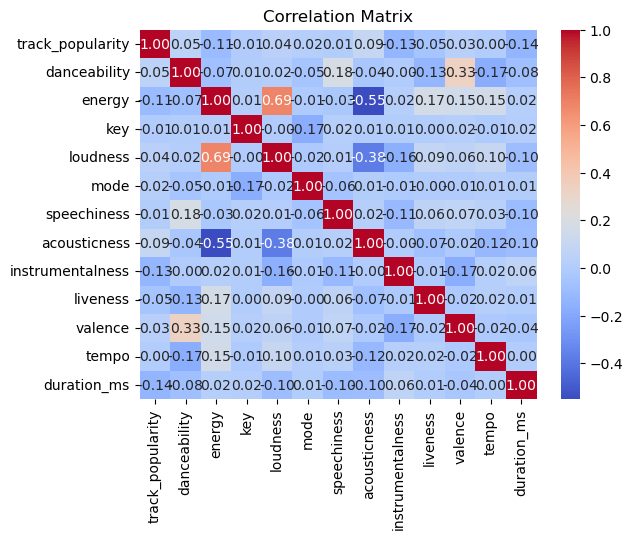

In [42]:
#correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [43]:
artist_counts = data['track_artist'].value_counts()
print(artist_counts.head(30))

Queen                        111
Martin Garrix                 73
David Guetta                  64
Logic                         62
Hardwell                      61
Don Omar                      59
The Chainsmokers              56
Dimitri Vegas & Like Mike     56
Drake                         47
Calvin Harris                 46
Guns N' Roses                 45
Gloria Estefan                44
Javiera Mena                  43
Daddy Yankee                  42
オメガトライブ                       42
Tiësto                        42
The Cranberries               42
Rick Ross                     41
Ballin Entertainment          40
Steve Aoki                    40
2Pac                          39
50 Cent                       39
Eminem                        39
Major Lazer                   38
The Weeknd                    38
Armin van Buuren              38
R3HAB                         38
Kygo                          37
Avicii                        37
The Notorious B.I.G.          36
Name: trac

C:\Users\HP\AppData\Local\Temp\ipykernel_8836\2882317381.py:9: UserWarning: Glyph 12458 (\N{KATAKANA LETTER O}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8836\2882317381.py:9: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8836\2882317381.py:9: UserWarning: Glyph 12460 (\N{KATAKANA LETTER GA}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8836\2882317381.py:9: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8836\2882317381.py:9: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_8836\2882317381.py:9: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipyke

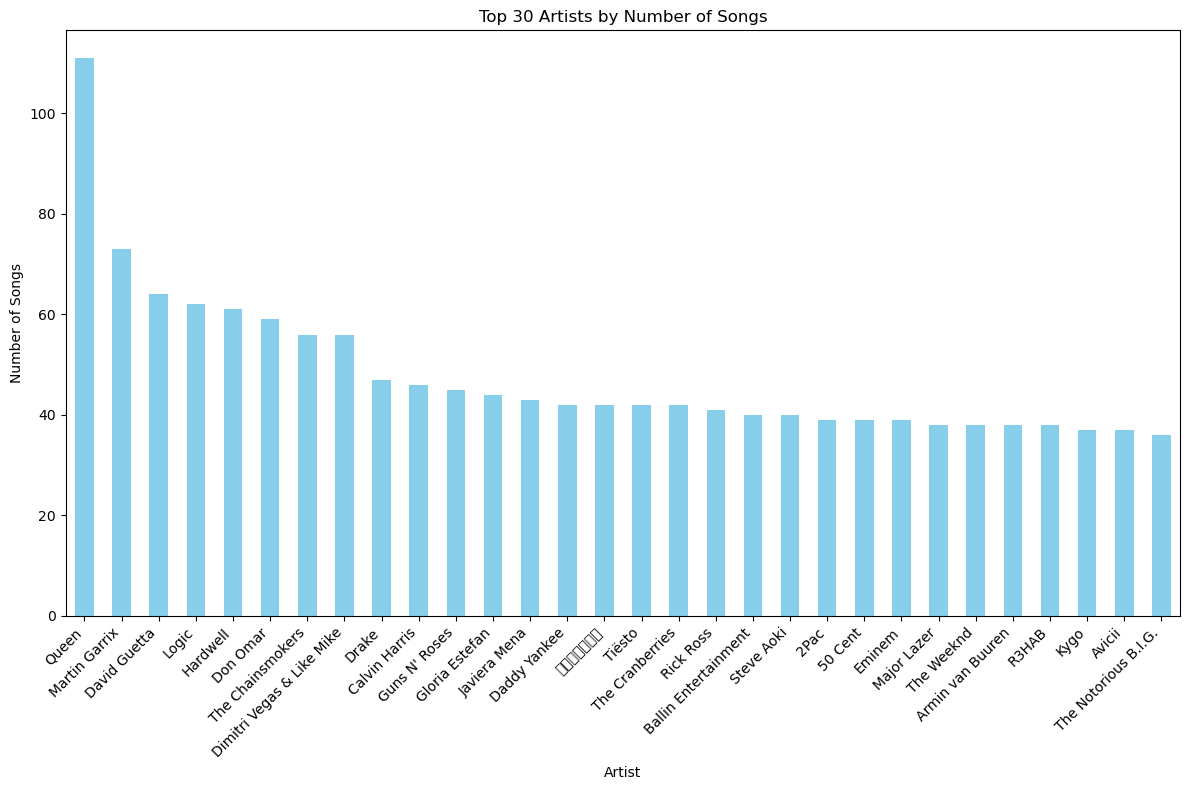

In [44]:
top_30_artists = artist_counts.head(30)
#bar graph
plt.figure(figsize=(12, 8))
top_30_artists.plot(kind='bar', color='skyblue')
plt.title('Top 30 Artists by Number of Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
data['playlist_genre'].value_counts()

rap      5165
pop      4836
edm      4603
r&b      4067
latin    3819
rock     3739
Name: playlist_genre, dtype: int64

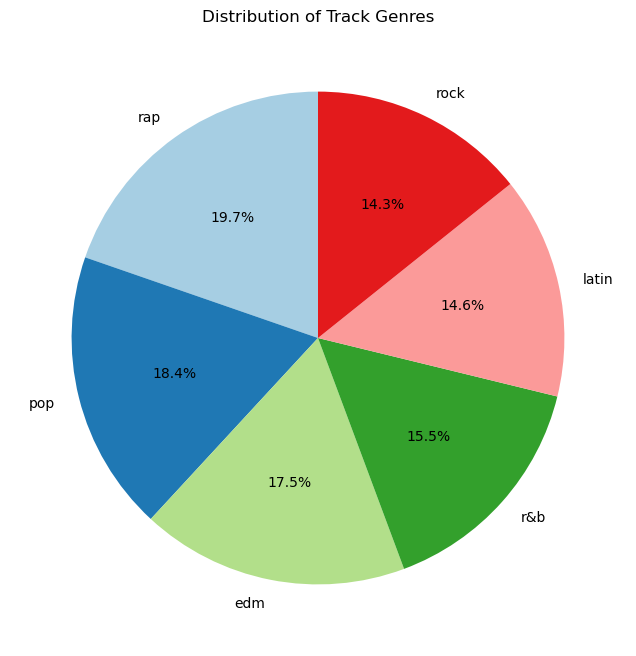

In [46]:
# Count the number of occurrences for each track genre
genre_counts = data['playlist_genre'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Track Genres')
plt.show()

In [47]:
data['playlist_subgenre'].value_counts()

southern hip hop             1505
indie poptimism              1474
neo soul                     1393
electro house                1382
progressive electro house    1363
hip hop                      1281
dance pop                    1276
gangster rap                 1194
trap                         1185
urban contemporary           1151
electropop                   1123
tropical                     1117
latin pop                    1061
latin hip hop                1053
album rock                   1013
hard rock                     997
big room                      982
post-teen pop                 963
classic rock                  880
pop edm                       876
permanent wave                849
new jack swing                784
hip pop                       739
reggaeton                     588
Name: playlist_subgenre, dtype: int64

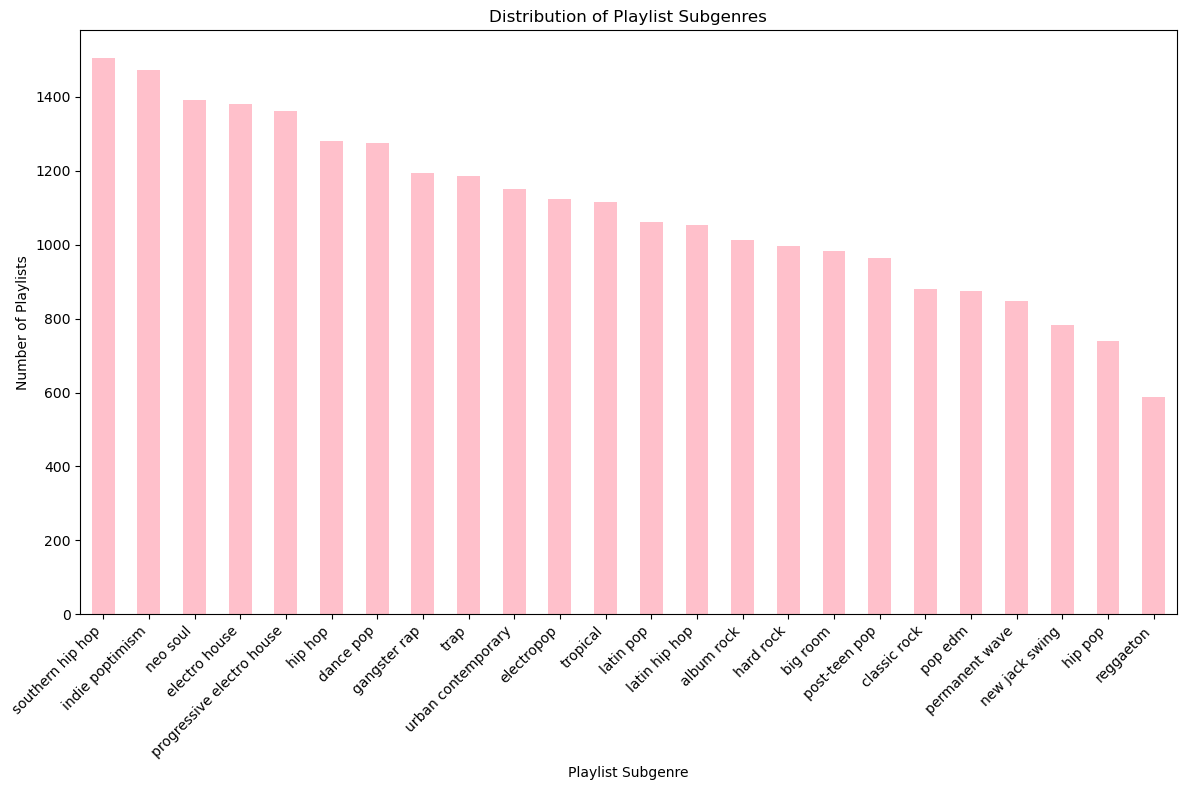

In [48]:
# Count the number of occurrences for each playlist subgenre
subgenre_counts = data['playlist_subgenre'].value_counts()

# Plot the bar graph
plt.figure(figsize=(12, 8))
subgenre_counts.plot(kind='bar', color='pink')
plt.title('Distribution of Playlist Subgenres')
plt.xlabel('Playlist Subgenre')
plt.ylabel('Number of Playlists')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

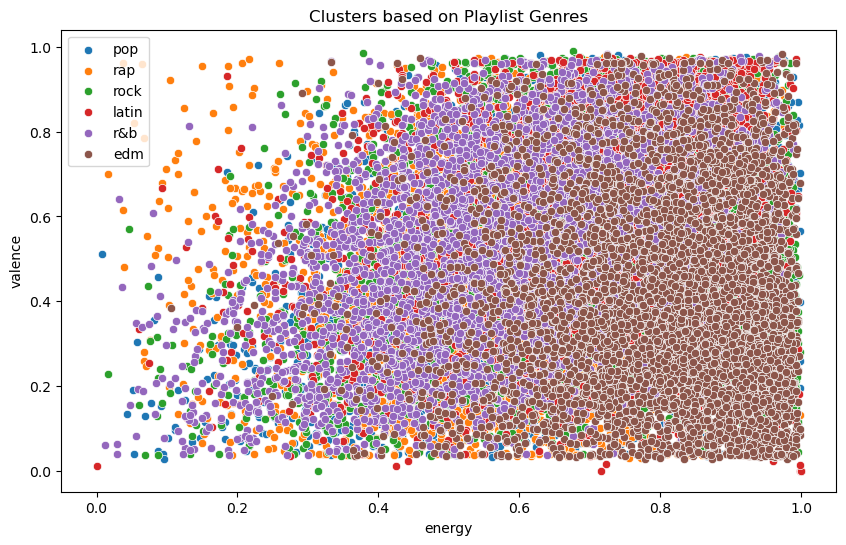

In [49]:
# Clustering based on playlist genres
plt.figure(figsize=(10, 6))
playlist_genres = data['playlist_genre'].unique()
for genre in playlist_genres:
    genre_data = data[data['playlist_genre'] == genre]
    sns.scatterplot(x='energy', y='valence', data=genre_data, label=genre)
plt.title('Clusters based on Playlist Genres')
plt.legend()
plt.show()

In [50]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
cols = data.iloc[:, 9:].select_dtypes(['uint8', 'int64', 'float64']).columns

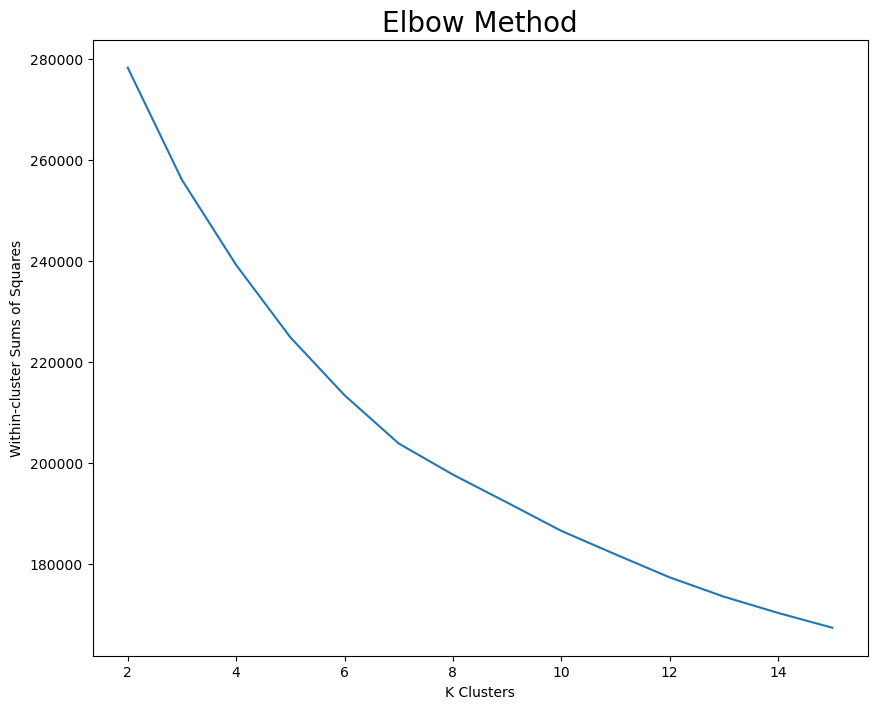

In [51]:
wcss = []
for i in range(2,16):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=1)
    d = StandardScaler().fit_transform(data[cols])
    km.fit(d)
    wcss.append(km.inertia_)
fig = plt.figure(figsize=(10,8))
ax = sns.lineplot(x=range(2,16), y=wcss)
ax.set_title('Elbow Method')
ax.title.set_size(20)
plt.xlabel('K Clusters')
plt.ylabel('Within-cluster Sums of Squares')
plt.show()


In [52]:
new_data=data[cols].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)
k=4
kmeans = KMeans(n_clusters=k, random_state=1)
cluster_labels = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.10559443877113443


In [53]:
cols

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

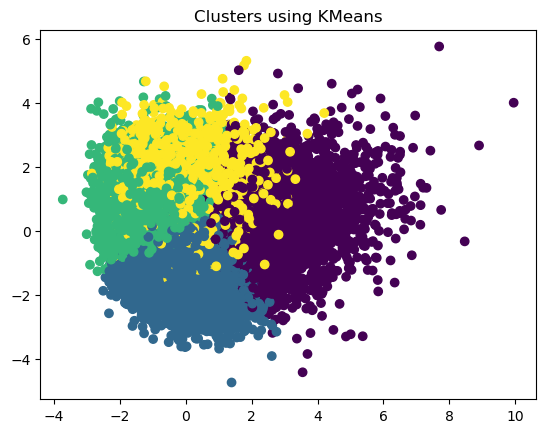

In [54]:
# Build Model (Example using KMeans)
features_for_clustering = ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']

X = data[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Use KMeans for clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(X_standardized)

# Plot clusters in 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis')
plt.title('Clusters using KMeans')
plt.show()



In [55]:
top_tracks_cluster_0 = data[data['cluster'] == 0].nlargest(15, 'track_popularity')
print("Top 15 tracks from Cluster 0:")
print(top_tracks_cluster_0[['track_name', 'track_artist', 'track_popularity']])

Top 15 tracks from Cluster 0:
                       track_name   track_artist  track_popularity
711                      Memories       Maroon 5                98
689           everything i wanted  Billie Eilish                97
3155                      Falling  Trevor Daniel                97
344                       bad guy  Billie Eilish                95
718             Someone You Loved  Lewis Capaldi                94
1303          HIGHEST IN THE ROOM   Travis Scott                94
739           Lose You To Love Me   Selena Gomez                93
922                  Dance Monkey    Tones and I                92
5533                      No Idea    Don Toliver                92
742                 Before You Go  Lewis Capaldi                90
1319       Trampoline (with ZAYN)          SHAED                90
1782                      7 rings  Ariana Grande                90
5517                     Suicidal      YNW Melly                90
5929   Ballin' (with Roddy Ricch

In [56]:
top_tracks_cluster_1 = data[data['cluster'] == 1].nlargest(15, 'track_popularity')
print("Top 15 tracks from Cluster 1:")
print(top_tracks_cluster_1[['track_name', 'track_artist', 'track_popularity']])

Top 15 tracks from Cluster 1:
                       track_name         track_artist  track_popularity
687                          Tusa              KAROL G                98
5508                      The Box          Roddy Ricch                98
1302              Don't Start Now             Dua Lipa                97
139     RITMO (Bad Boys For Life)  The Black Eyed Peas                96
694                         Yummy        Justin Bieber                95
646                       Ride It               Regard                94
1306              hot girl bummer            blackbear                94
1463      My Oh My (feat. DaBaby)       Camila Cabello                94
702                         China             Anuel AA                93
709                      Señorita         Shawn Mendes                93
5507   Life Is Good (feat. Drake)               Future                93
5514                          BOP               DaBaby                93
11115                

In [57]:
top_tracks_cluster_2 = data[data['cluster'] == 2].nlargest(15, 'track_popularity')
print("Top 15 tracks from Cluster 2:")
print(top_tracks_cluster_2[['track_name', 'track_artist', 'track_popularity']])

Top 15 tracks from Cluster 2:
                                              track_name    track_artist  \
716                                      Blinding Lights      The Weeknd   
730                                            Heartless      The Weeknd   
720             Bandit (with YoungBoy Never Broke Again)      Juice WRLD   
1314                                   How Do You Sleep?       Sam Smith   
1333                                            Callaita       Bad Bunny   
1611                                    Watermelon Sugar    Harry Styles   
18360                        Goodbyes (feat. Young Thug)     Post Malone   
25788                    All I Want for Christmas Is You    Mariah Carey   
1327          Good as Hell (feat. Ariana Grande) - Remix           Lizzo   
5540   HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...    Travis Scott   
1341               Loco Contigo (feat. J. Balvin & Tyga)        DJ Snake   
1344                                           Si Te Vas  

In [58]:
top_tracks_cluster_3 = data[data['cluster'] == 3].nlargest(15, 'track_popularity')
print("Top 15 tracks from Cluster 3:")
print(top_tracks_cluster_3[['track_name', 'track_artist', 'track_popularity']])

Top 15 tracks from Cluster 3:
                             track_name           track_artist  \
18562  Baila Conmigo (feat. Kelly Ruiz)                  Dayvi   
22997                        In My Room            Frank Ocean   
634                              Baianá               Bakermat   
1110    Feels Like We Only Go Backwards            Tame Impala   
1223                      Instant Crush              Daft Punk   
5054                 On Melancholy Hill               Gorillaz   
14448            Heroes - 2017 Remaster            David Bowie   
13622            1979 - Remastered 2012  The Smashing Pumpkins   
23031                            A Palé                ROSALÍA   
11762                   Born To Be Wild            Steppenwolf   
13672                          Reptilia            The Strokes   
14051       Blue Monday - 2016 Remaster              New Order   
14575             Chamber Of Reflection            Mac DeMarco   
4147                              Intro       

In [59]:
data['track_popularity'].describe()

count    26229.000000
mean        39.508178
std         23.265382
min          0.000000
25%         22.000000
50%         42.000000
75%         58.000000
max         98.000000
Name: track_popularity, dtype: float64

In [60]:
data['cluster'].value_counts()

1    10898
2     8740
0     4285
3     2306
Name: cluster, dtype: int64

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

data['new_index'] = range(1, len(data) + 1)
data.set_index('new_index', inplace=True)

# Create keywords column by combining track_name and track_artist
data['keywords'] = data['track_name'] + ' ' + data['track_artist']

# Extract genres and create a genre matrix
genres = data['playlist_genre'].str.split(',').explode().str.strip()
genre_matrix = pd.get_dummies(genres).groupby(level=0).sum()

# Combine keywords and genre_matrix
feature_matrix = pd.concat([data['keywords'], genre_matrix], axis=1)

# Create user profile based on favorite genres
favorite_genres = ['edm','pop']
user_profile = pd.DataFrame({'genre_matrix': np.isin(genre_matrix.columns, favorite_genres).astype(int)})

# Calculate similarity scores
similarity_scores = cosine_similarity(feature_matrix.drop(columns='keywords'), user_profile.T)

# Combine similarity scores with the original data
data_recommendations = pd.concat([data, pd.DataFrame({'similarity': similarity_scores.flatten()})], axis=1)

# Get top N recommendations
N = 25
sorted_recommendations = data_recommendations.sort_values(by='similarity', ascending=False)
top_songs = sorted_recommendations.head(N)[["track_name", "track_artist", "playlist_genre", "track_popularity","similarity"]]

# Display top recommendations
print(top_songs)


                                              track_name      track_artist  \
1      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
23095                                            The End           SpinRox   
23079                                            Haunted          Dave Mak   
23080                                         Mad Echoes      Swede Dreams   
23081                                              Raise            VITIZE   
23082                                            Gringos              Kevu   
23083                                         Don't Stop              H2HB   
23084                                              Omega              KaZo   
23085                                              Never          Widemode   
23086                                             Mantra             NAEMS   
23087                                      Outta Control      Winning Team   
23088                                           Dominica        